In [1]:
import xarray as xr
import numpy  as np
# import seaborn as sns
import proplot as pplt
import pandas as pd
import matplotlib.pyplot as plt

2021.04.19

进行分区之后的绘制脚本，分区在此前已经由cdo完成

计算采用同目录下的 timeseries_count.py 使用import进行导入之后使用，其中进行了五天的滑动平均

将计算结果保存到 partial_mean partial_std 之中，作为字典整理为pandas，进行timeseries的绘图

2021.08.16

更大区域，新增两个分区，考虑使用proplot进行绘图

2022.02.07

将分析序列减短到MJJA，直接使用位置选取出 [30:]

In [2]:
# from timeseries_count import *

# get partial mask_res collect into a dict
partial_list = ["NE", "NC", "YZ", "SC",'SW','NWC']
path_in = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA_large/partial_pre"
file_ref= "obsmerge_pre_98-17.nc"
file_vr = "vr_pre_98-17.nc"
file_rcm = "rcm_pre_98-17.nc"
partial_mean = {} # partial mask_res
partial_std = {} # partial mask_res
var = {}
for iregion in partial_list:
    ds_or = {}
    var[iregion] = {}
    path_in_partial = path_in + "/" + iregion + "/ydaymean/" # refine path
    print(path_in_partial)
    ds_or['obs'] = xr.open_dataset(path_in_partial + file_ref)
    ds_or['vr']     = xr.open_dataset(path_in_partial + file_vr)
    ds_or['rcm']    = xr.open_dataset(path_in_partial + file_rcm  )
    # 提取变量
    var[iregion]['obs'] = ds_or['obs']['premerge'][30:, :,:]
    var[iregion]['vr'] = ds_or['vr']['precip_MPAS'][30:, :,:]
    var[iregion]['rcm'] = ds_or['rcm']['precip_MPAS'][30:, :,:]

    var[iregion]['obs'] = var[iregion]['obs'].reset_coords(names = 'lev', drop = True) # 去除掉obs中多余的lev coords

    # change coords
    var_list = ['obs', 'vr', 'rcm']
    for i in var_list:
        rename_dict = dict(zip(var[iregion][i].coords.keys(), var[iregion]['obs'].coords.keys()))
    #     # show converting coords
        for rename_i in rename_dict:
            print(rename_i + " -----converting to----- " + rename_dict[rename_i])

        var[iregion][i] = var[iregion][i].rename(rename_dict)
        var[iregion][i]._coords = var[iregion]['obs']._coords
        var[iregion][i] = var[iregion][i].rename(i)


/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA_large/partial_pre/NE/ydaymean/
time -----converting to----- time
lon -----converting to----- lon
lat -----converting to----- lat
Time -----converting to----- time
longitude -----converting to----- lon
latitude -----converting to----- lat
Time -----converting to----- time
longitude -----converting to----- lon
latitude -----converting to----- lat
/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA_large/partial_pre/NC/ydaymean/
time -----converting to----- time
lon -----converting to----- lon
lat -----converting to----- lat
Time -----converting to----- time
longitude -----converting to----- lon
latitude -----converting to----- lat
Time -----converting to----- time
longitude -----converting to----- lon
latitude -----converting to----- lat
/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA_large/partial_pre/YZ/ydaymean/
time -----converting to----- time
lon -----converting to----- lon
lat -----converting to----- lat
Time -----converting to----- time
longitude -----conve

## 计算绘图指标

### 进行统计指标的制表计算

In [3]:
import skill_metrics as sm
metrics_ts = {}
var_list = ['vr', 'rcm']
for iregion in partial_list:
    metrics_ts[iregion] = pd.DataFrame(index = ['vr','rcm'], columns=['Bias','RMSE','Corr.']) 
    for imod in var_list:
        temp_obs = var[iregion]['obs'].mean(dim=['lat','lon']).values
        temp_mod = var[iregion][imod].mean(dim=['lat','lon']).values

        metrics_ts[iregion].loc[imod]['Bias'] = sm.bias(temp_mod, temp_obs)
        metrics_ts[iregion].loc[imod]['RMSE'] = sm.rmsd(temp_mod, temp_obs)
        metrics_ts[iregion].loc[imod]['Corr.'] = np.corrcoef(temp_mod, temp_obs)[0,1]
    
    # 对style进行调整，用于后续展示表格
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
    # metrics_ts[iregion] = metrics_ts[iregion].style.format("{:,.3f}")

### 进行五点平滑之后再进行绘图

In [4]:
var_ts_rmean = {}
var_list = ['obs', 'vr', 'rcm']
for iregion in partial_list:
    var_ts_rmean[iregion] = {}
    for imod in var_list:
        var_ts_rmean[iregion][imod] = var[iregion][imod].mean(dim=['lat','lon']).rolling(time=5, center=True).mean()


## 绘图部分

### 直接绘制序列图

/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/proplot/internals/process.py:84: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  np.issubdtype(array.dtype, np.str)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/proplot/internals/process.py:85: FutureWarning: Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.
  or np.issubdtype(array.dtype, np.object)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/proplot/internals/process.py:84: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  np.issubdtype(array.dtype, np.str)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/si

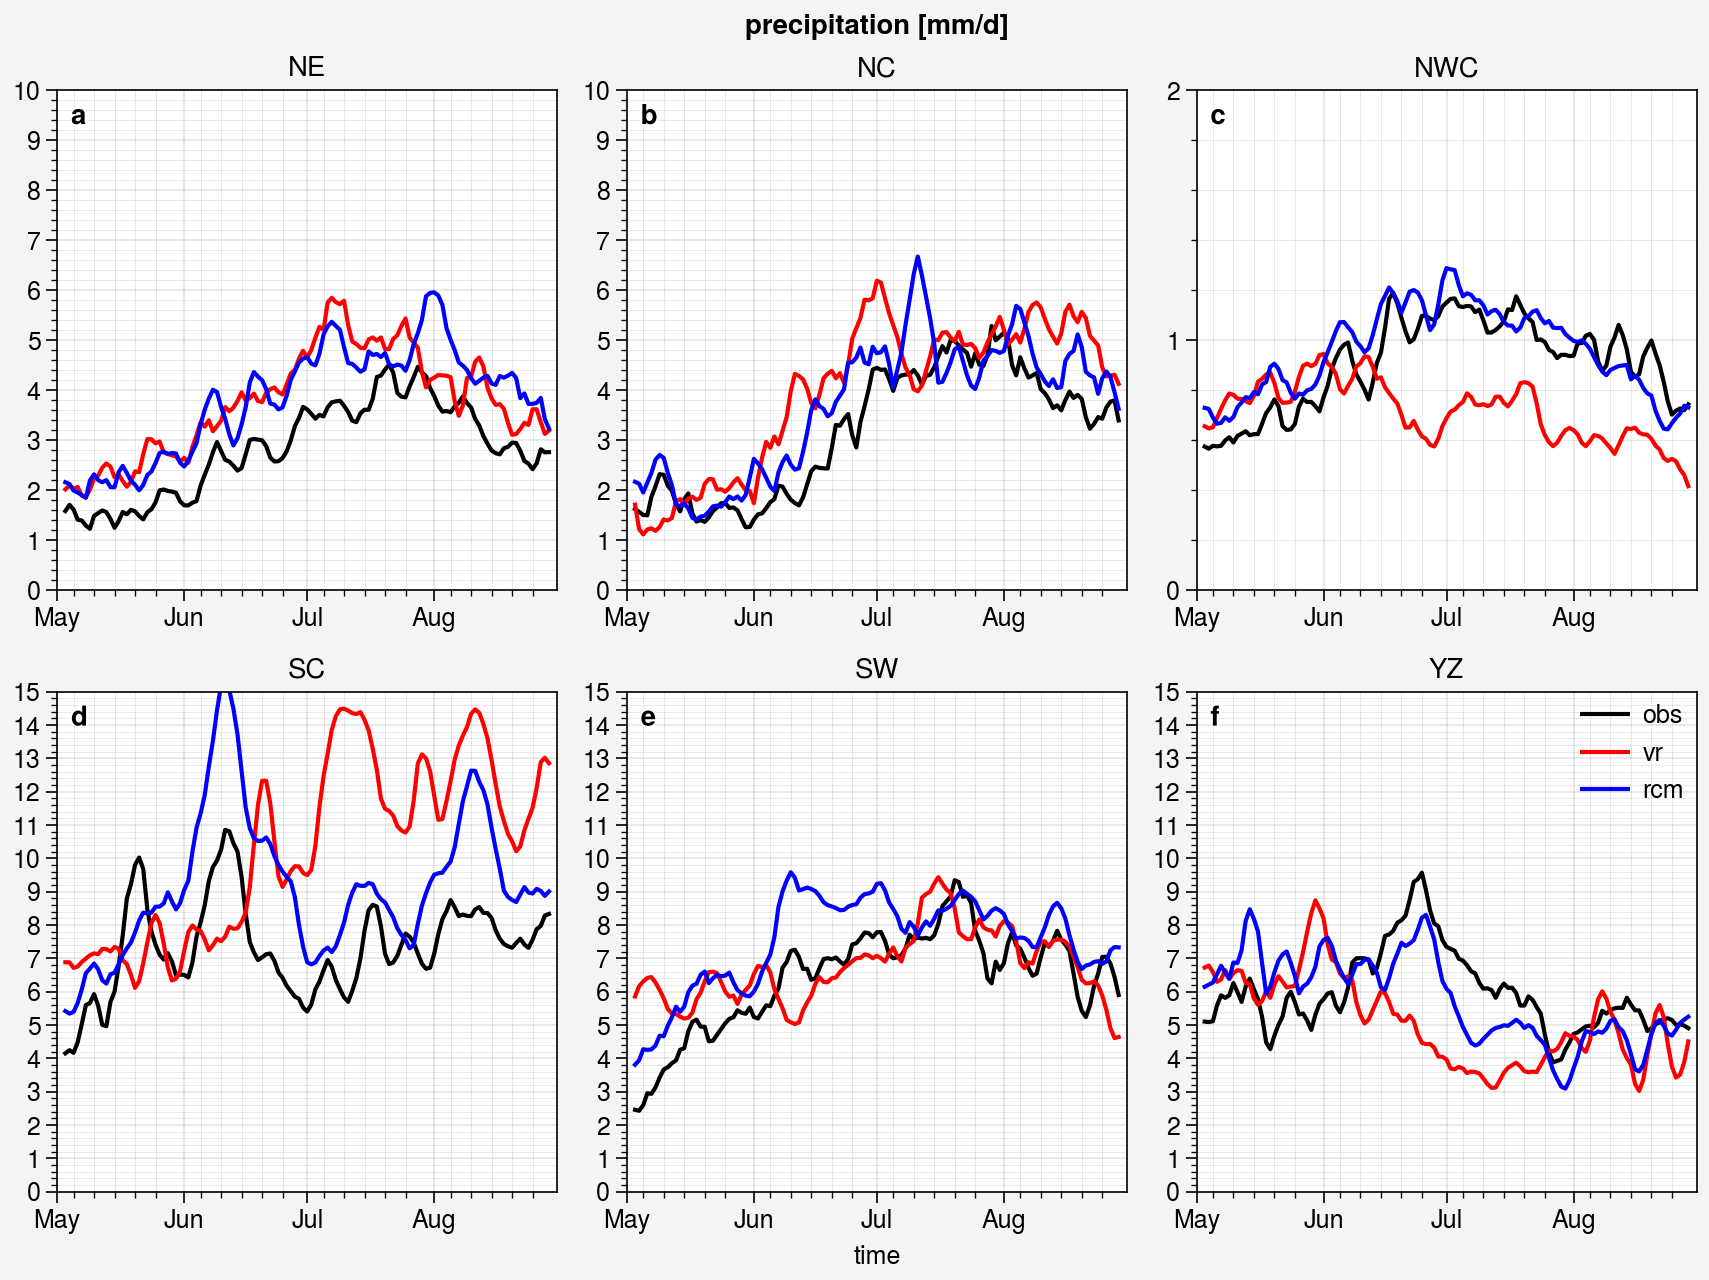

In [5]:
from matplotlib import pyplot as plt
import proplot as pplt
# ----- get filter vars coords-----
partial_list = ["NE", "NC", "NWC", "SC",'SW','YZ']
#----- create plot -----
fig, axs = pplt.subplots(ncols=3 ,nrows=2, share=1)
for axs_idx, iregion in enumerate( partial_list ):
    obs_plot = axs[axs_idx].plot(var_ts_rmean[iregion]['obs'].time, var_ts_rmean[iregion]['obs'].values, color = 'k', label = 'obs')
    vr_plot  = axs[axs_idx].plot(var_ts_rmean[iregion]['vr'].time, var_ts_rmean[iregion]['vr'].values, color = 'r', label = 'vr')
    rcm_plot = axs[axs_idx].plot(var_ts_rmean[iregion]['rcm'].time, var_ts_rmean[iregion]['rcm'].values, color = 'b', label = 'rcm')
    axs[axs_idx].format(
        abc = True,
        abcloc = 'ul',
        # -----
        xlim=(np.datetime64('2017-05-01'), np.datetime64('2017-08-31')),
        ylim = (0,15.),
        ylocator = 1.,
        # yminorlocator = np.arange(0,1.4,0.1),
        yminorlocator = 0.2,
        # ----- time ticks setting -----
        xrotation = False,
        xgrid = True,
        xgridminor = True,
        ygridminor = True,
        xminorlocator=('day',range(0,30,5)),
        xlocator=('month',range(0,12,1)),
        xformatter = '%b', #title='Ticks every N units',
        title = iregion,
        suptitle = 'precipitation [mm/d]'
    )
# ----- add legend -----
axs[5].legend([obs_plot,vr_plot,rcm_plot], loc='ur', ncols=1, frame=False)
# ----- setting limit -----
axs[0:2].format(ylim = (0,10))
axs[2].format(ylim = (0,2))
axs[5].format(ylim = (0,15))

# saving figs
# plt.savefig("./output_pic/pre_ts_6region_pplt.png", dpi = 600, facecolor = "white")

### 尝试添加表格

/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/proplot/internals/process.py:84: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  np.issubdtype(array.dtype, np.str)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/proplot/internals/process.py:85: FutureWarning: Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.
  or np.issubdtype(array.dtype, np.object)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/proplot/internals/process.py:84: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  np.issubdtype(array.dtype, np.str)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/si

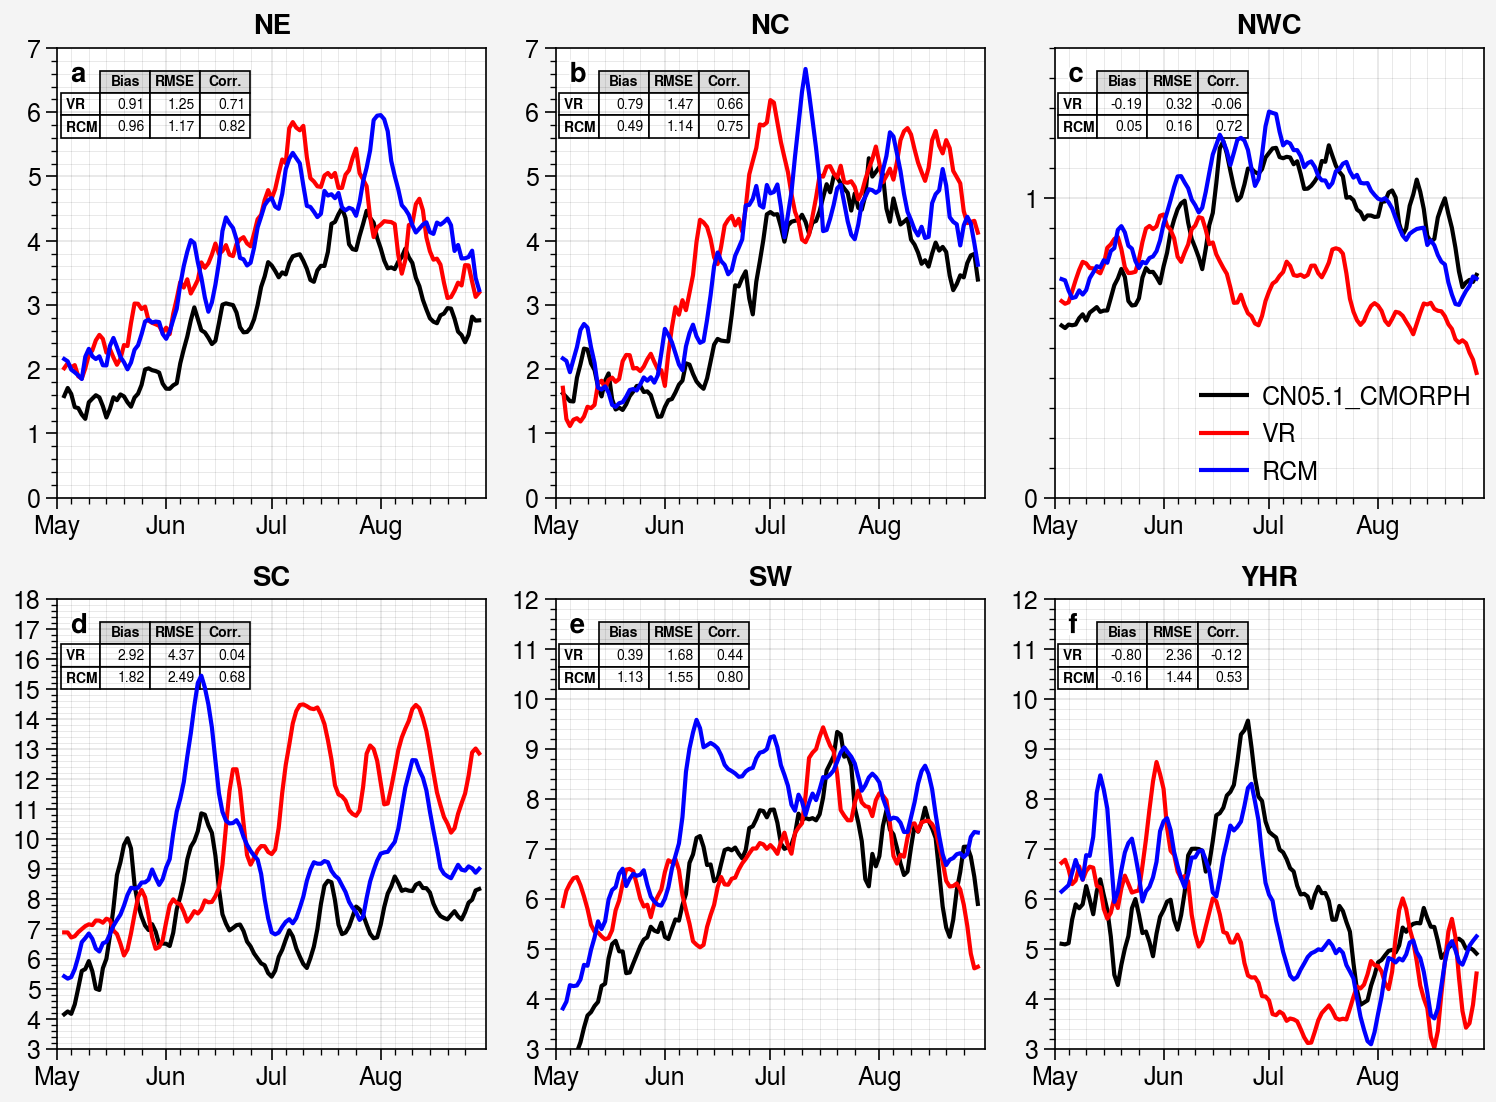

In [7]:
from matplotlib import pyplot as plt
import proplot as pplt
from matplotlib.font_manager import FontProperties

# ----- get filter vars coords-----
partial_list = partial_list = ["NE", "NC", "NWC", "SC",'SW','YZ']
#----- create plot -----
fig, axs = pplt.subplots(ncols=3 ,nrows=2, share=1, figwidth = '190mm', figheight = '140mm')
for axs_idx, iregion in enumerate( partial_list ):
    obs_plot = axs[axs_idx].plot(var_ts_rmean[iregion]['obs'].time, var_ts_rmean[iregion]['obs'].values, color = 'k', label = 'CN05.1_CMORPH')
    vr_plot  = axs[axs_idx].plot(var_ts_rmean[iregion]['vr'].time, var_ts_rmean[iregion]['vr'].values, color = 'r', label = 'VR')
    rcm_plot = axs[axs_idx].plot(var_ts_rmean[iregion]['rcm'].time, var_ts_rmean[iregion]['rcm'].values, color = 'b', label = 'RCM')
    # ----- add table on axis -----
    # 参考回答：https://stackoverflow.com/questions/54150557/how-to-show-dataframe-index-name-on-a-matplotlib-table
    # 使用bbox调整表格的大小
    plot_table = metrics_ts[iregion].applymap("{:,.2f}".format)
    # table = axs[axs_idx].table(cellText=np.matrix.round(plot_table.values.astype('float'),3),\
    table = axs[axs_idx].table(cellText=plot_table.values,\
         rowLabels=["$\\bf{VR}$","$\\bf{RCM}$"], colLabels=plot_table.columns, loc = 'upper left',colColours=['gainsboro'] * 3,\
             colWidths = [0.13]*3, bbox = [0.1, 0.80, 0.35, 0.15])
    table.auto_set_font_size(False) # 关闭自动网格字体大小设置
    table.set_fontsize(5.) # 设置数字字体大小
    # table.set_fontweight('roman')
                #  colColours=['gainsboro'] * len(plot_table), colLabels=plot_table.columns, loc='center',
                #  colWidths= [0.12]*(len(plot_table.columns)))
    for (row, col), cell in table.get_celld().items():
        if ((row == 0)):
            cell.set_text_props(fontproperties=FontProperties(weight='bold', size = 5.))

    axs[axs_idx].format(
        abc = True,
        abcloc = 'ul',
        # -----
        xlim=(np.datetime64('2017-05-01'), np.datetime64('2017-08-31')),
        ylim = (0,15.),
        ylocator = 1.,
        # yminorlocator = np.arange(0,1.4,0.1),
        yminorlocator = 0.2,
        # ----- time ticks setting -----
        xrotation = False,
        xgrid = True,
        xgridminor = True,
        ygridminor = True,
        xminorlocator=('day',range(0,30,5)),
        xlocator=('month',range(0,12,1)),
        xformatter = '%b', #title='Ticks every N units',
        title = iregion,
        titleweight='bold',
        # suptitle = 'precipitation [mm/d]'
        xlabel = '',
        ylabel = '',
    )

# cited title
axs[5].format(title = "YHR")

# ----- add legend -----
axs[2].legend([obs_plot,vr_plot,rcm_plot], loc='lr', ncols=1, frame=False)
# ----- setting limit -----
axs[0:2].format(ylim = (0,7))
axs[2].format(ylim = (0,1.5), yminorlocator = 0.1)
axs[3].format(ylim = (3.,18.))
axs[4:6].format(ylim = (3.,12.))
# axs[5].format(ylim = (0,15))

# saving figs
plt.savefig("./output_pic/pre_ts_6region_pplt_addtable_2022.05.02.jpg", dpi = 600, facecolor = "white")